In [501]:

import torch 
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import os
from torch.utils.data import Dataset, DataLoader,TensorDataset
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from torch.autograd import Variable
import torch.nn.functional as F

In [347]:
#load csv file
directory = "data\linear"
file = "wine.csv"
path = os.path.join(directory,file)
print(path)


data_frame = pd.read_csv(path)

x = data_frame.iloc[:,0:11]
y = data_frame[['quality']]
x

data\linear\wine.csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [294]:
scaler = StandardScaler()
x = torch.tensor(data_frame.iloc[:,0:10].values,dtype=torch.float32)
print(type(x))
x_sc = torch.tensor(scaler.fit_transform(x),dtype=torch.float32)
print(x_sc.shape)

<class 'torch.Tensor'>
torch.Size([1599, 10])


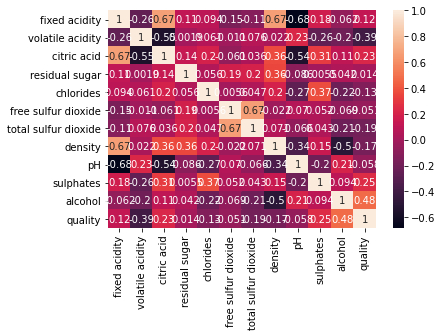

In [349]:
sns.heatmap(data_frame.corr(),annot=True)

In [348]:
data_frame.iloc[:,0:11].values.shape

(1599, 11)

## Wine prediction

In [337]:
#Implement own dataset

class LinearDataset(Dataset):

    def __init__(self,directory_path,file_name,Tranform = False):
        super(LinearDataset,self).__init__()
        # assign path before read csv
        self.directory_path = directory_path
        self.file_name = file_name
        self.Tranform = Tranform
        #join path

        data_directory = os.path.join(directory_path,file_name)

        #read csv
        data_frame = pd.read_csv(data_directory)
        self.x = torch.tensor(data_frame.iloc[:,0:1].values,dtype=torch.float32)
        self.y = torch.tensor(data_frame[['quality']].values,dtype=torch.float32)

        if self.Tranform:
            scaler = StandardScaler()
            self.x = torch.tensor(scaler.fit_transform(self.x),dtype=torch.float32)
            print(self.x.shape)

    def __len__(self):
        return data_frame.shape[0]
    
    def __getitem__(self,idx):
        return self.x[idx] , self.y[idx]
        

In [338]:
dataset = LinearDataset(directory_path = directory,file_name = file,Tranform = True)

torch.Size([1599, 1])


In [339]:
#define network
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, hiddenSize ,outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, hiddenSize)
        self.linear2 = torch.nn.Linear(hiddenSize,outputSize)
        self.linear3 = torch.nn.Linear(inputSize,outputSize)

    def forward(self, x):
        out = self.linear3(x)
        return out

In [423]:
inputDim = 1     # takes variable 'x' 
outputDim = 1
hiddenDim = 5       # takes variable 'y'
learningRate = 0.0001 
num_epochs = 500

model = linearRegression(inputDim, hiddenDim ,outputDim)


criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [341]:
dataload = torch.utils.data.DataLoader(dataset,batch_size = 10,shuffle=True)

In [342]:
loss_list = []
for epochs in range(num_epochs):
    for data,label in dataload:
        # get output from the model, given the inputs
        optimizer.zero_grad()
        outputs = model(data)
        # get loss for the predicted output
        loss = criterion(outputs, label)
        
        # get gradients w.r.t to parameters
        
        loss.backward()
        
        # update parameters
        optimizer.step()
    loss_list.append(loss.data)
    if epochs % 10 == 0:
         print('epoch {}, loss {}'.format(epochs, loss.item()))


epoch 0, loss 30.16145133972168
epoch 10, loss 14.042072296142578
epoch 20, loss 7.64215612411499
epoch 30, loss 3.5178844928741455
epoch 40, loss 3.5263519287109375
epoch 50, loss 1.6615363359451294
epoch 60, loss 1.4583567380905151
epoch 70, loss 0.537296712398529
epoch 80, loss 0.41399621963500977
epoch 90, loss 0.6004401445388794
epoch 100, loss 0.7144333720207214
epoch 110, loss 0.25220635533332825
epoch 120, loss 0.6111446022987366
epoch 130, loss 0.642385721206665
epoch 140, loss 0.3786778450012207
epoch 150, loss 0.6890919208526611
epoch 160, loss 0.5979433655738831
epoch 170, loss 1.3450945615768433
epoch 180, loss 0.7340653538703918
epoch 190, loss 0.28611695766448975
epoch 200, loss 0.5177856683731079
epoch 210, loss 0.265173077583313
epoch 220, loss 0.4915856122970581
epoch 230, loss 0.3359096348285675
epoch 240, loss 0.3541633188724518
epoch 250, loss 0.6471500992774963
epoch 260, loss 0.5673550963401794
epoch 270, loss 0.4998519718647003
epoch 280, loss 0.4022959172725677

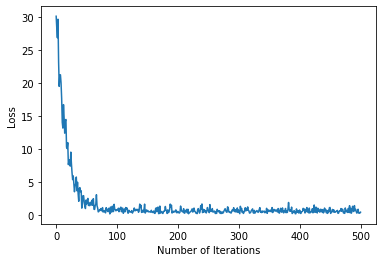

In [350]:
def plot_loss(epoch,loss):
    plt.plot(range(epoch),loss)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss")
    plt

plot_loss(num_epochs,loss_list)